## **Exploratory Data Analysis: Global Unicorn Companies**

Yuejia Huang (github.com/yhuang084)


**The purpose** of this project is to conduct exploratory data analysis on a dataset that contains information on global unicorn companies* from 2007 to September 2023. 

**The goal** of this project is to clean the dataset and ask questions using visualizations.

_This project has 4 parts:_

   1. Imports and loading
   2. Data exploration and data cleaning
   3. building visualizations
   4. Evaluation and share results


_Note: a unicorn company is a privately held startup company balued at over US$1 billion._

## **1. Imports and loading**

In [26]:
#operational libraries
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#data manipulation
from datetime import datetime

#geolocation
import geopandas as gpd

In [27]:
#load the dataset
companies = pd.read_csv('/Users/yuejiahuang/Desktop/Data Analysis/Python Projects/Unicorn_company/Unicorn_company.csv')

## **2.Data exploration and data cleaning**

There are few things we should considers:

 1. Missing data
 2. Outliers
 3. Incorrect or inconsistent data (e.g. negative value for year)
 4. Distribution of data

In [28]:
#check the first 10 rows
companies.head(10)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,ByteDance,$225,4/7/2017,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$137,12/1/2012,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$66,7/3/2018,Singapore,NaN,Consumer & Retail,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$50,1/23/2014,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG"
4,Databricks,$43,2/5/2019,United States,San Francisco,Enterprise Tech,"Andreessen Horowitz, New Enterprise Associates..."
5,Canva,$40,1/8/2018,Australia,Surry Hills,Enterprise Tech,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Revolut,$33,4/26/2018,United Kingdom,London,Financial Services,"Index Ventures, DST Global, Ribbit Capital"
7,Epic Games,$31.50,10/26/2018,United States,Cary,Media & Entertainment,"Tencent Holdings, KKR, Smash Ventures"
8,Fanatics,$31,6/6/2012,United States,Jacksonville,Consumer & Retail,"SoftBank Group, Andreessen Horowitz, Temasek H..."
9,OpenAI,$29,7/22/2019,United States,San Francisco,Enterprise Tech,Khosla Ventures


In [29]:
#check the numbers of columns and rows
companies.shape

(1222, 7)

In [30]:
#check the information on all columns and data types
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1222 non-null   object
 1   Valuation ($B)    1222 non-null   object
 2   Date Joined       1222 non-null   object
 3   Country           1220 non-null   object
 4   City              1203 non-null   object
 5   Industry          1222 non-null   object
 6   Select Investors  1217 non-null   object
dtypes: object(7)
memory usage: 67.0+ KB


The dataset has 1222 rows and 7 columns. It contains informations on 1222 unicorn companies: their valuations (in billions of USD) ranked in descending order, the date they became unicorn, geographical locations, industries and select investors.

All variables are of _object_ type and some data conversion is needed for further analyses. For example, we need to convert Valuation ($B) to numeric, Date Joined to the type _datetime_.

There are missing data on columns Country, City and Select Investors. It's natural to investigate those missing data.

In [31]:
#pull out rows with missing entries
companies[companies.isna().any(axis=1)]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
2,SHEIN,$66,7/3/2018,Singapore,NaN,Consumer & Retail,"Tiger Global Management, Sequoia Capital China..."
239,HyalRoute,$3.50,5/26/2020,Singapore,NaN,Industrials,Kuang-Chi
312,Amber Group,$3,6/21/2021,Hong Kong,NaN,Financial Services,"Tiger Global Management, Tiger Brokers, DCM Ve..."
340,Moglix,$2.60,5/17/2021,Singapore,NaN,Industrials,"Jungle Ventures, Accel, Venture Highway"
368,Coda Payments,$2.50,4/15/2022,Singapore,NaN,Financial Services,"GIC. Apis Partners, Insight Partners"
470,Helsing,$1.82,9/14/2023,Munchen,Germany,Enterprise Tech,NaN
472,Quest Global,$1.8,8/8/2023,NaN,Singapore,Industrials,NaN
485,Advance Intelligence Group,$2,9/23/2021,Singapore,NaN,Financial Services,"Vision Plus Capital, GSR Ventures, ZhenFund"
497,Trax,$2,7/22/2019,Singapore,NaN,Consumer & Retail,"Hopu Investment Management, Boyu Capital, DC T..."
530,Scroll,$1.80,3/14/2023,Seychelles,NaN,Financial Services,"OKX Ventures, Sequoia Capital China, IOSG"


Most of companies with incomplete geographical information are located in either Hong Kong or Singapore. Those two cities have independent jurisditions so their names can represent either city or country. We will fill their Country column with the city name. We will leave the missing entries in the column City as they are because we will conduct analysis on countries only. For those without information on selected investors, we will fill with "NaN" because those comapnies have small valuations and will not have significant impact on analysis of investment.

In [32]:
#fill value in the column Country
companies.loc[companies['Company'] == 'Quest Global'] = companies.loc[companies['Company'] == 'Quest Global'].fillna('Singapore')
companies.loc[companies['Company'] == 'Micro Connect'] = companies.loc[companies['Company'] == 'Micro Connect'].fillna('Hong Kong')
companies.loc[companies['Company'] == 'Helsing'] = companies.loc[companies['Company'] == 'Helsing'].fillna('Not Available')
companies.loc[companies['Company'] == 'Avenue One'] = companies.loc[companies['Company'] == 'Avenue One'].fillna('Not Available')
companies.loc[companies['Company'] == 'Imbue'] = companies.loc[companies['Company'] == 'Imbue'].fillna('Not Available')
companies.loc[companies['Company'] == 'LinkSure Network'] = companies.loc[companies['Company'] == 'LinkSure Network'].fillna('Not Available')

companies[companies.isna().any(axis=1)]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
2,SHEIN,$66,7/3/2018,Singapore,NaN,Consumer & Retail,"Tiger Global Management, Sequoia Capital China..."
239,HyalRoute,$3.50,5/26/2020,Singapore,NaN,Industrials,Kuang-Chi
312,Amber Group,$3,6/21/2021,Hong Kong,NaN,Financial Services,"Tiger Global Management, Tiger Brokers, DCM Ve..."
340,Moglix,$2.60,5/17/2021,Singapore,NaN,Industrials,"Jungle Ventures, Accel, Venture Highway"
368,Coda Payments,$2.50,4/15/2022,Singapore,NaN,Financial Services,"GIC. Apis Partners, Insight Partners"
485,Advance Intelligence Group,$2,9/23/2021,Singapore,NaN,Financial Services,"Vision Plus Capital, GSR Ventures, ZhenFund"
497,Trax,$2,7/22/2019,Singapore,NaN,Consumer & Retail,"Hopu Investment Management, Boyu Capital, DC T..."
530,Scroll,$1.80,3/14/2023,Seychelles,NaN,Financial Services,"OKX Ventures, Sequoia Capital China, IOSG"
557,Kredivo Holdings,$1.66,8/15/2022,Singapore,NaN,Financial Services,"Jungle Ventures, Square Peg Capital, OpenSpace..."
616,bolttech,$1.50,7/1/2021,Singapore,NaN,Insurance,"Mundi Ventures, Doqling Capital Partners, Acti..."


Let's also check to see if there is incorrect or inconsistent data in the columns Country and City.

In [33]:
#check the list of countries
companies['Country'].unique()

array(['China', 'United States', 'Singapore', 'Australia',
       'United Kingdom', 'Indonesia', 'Germany', 'India', 'Hong Kong',
       'Israel', 'Seychelles', 'Sweden', 'Turkey', 'Mexico', 'Estonia',
       'Canada', 'South Korea', 'Netherlands', 'France', 'Finland',
       'Colombia', 'Belgium', 'Brazil', 'Denmark', 'Switzerland',
       'Lithuania', 'Austria', 'Ireland', 'Vietnam',
       'United Arab Emirates', 'Argentina', 'Spain', 'Greece', 'Japan',
       'Munchen', 'Luxembourg', 'Nigeria', 'Croatia', 'Senegal',
       'Malaysia', 'Bermuda', 'Norway', 'South Africa', 'Ecuador',
       'Chile', 'Thailand', 'Czech Republic', 'Cayman Islands',
       'Liechtenstein', 'Italy', 'Philippines', 'London'], dtype=object)

Munchun and London are not Countries, we need to fix it.


In [34]:
print(companies[companies['Country']=='Munchen'])
print(companies[companies['Country']=='London'])

     Company Valuation ($B) Date Joined  Country     City         Industry  \
470  Helsing          $1.82   9/14/2023  Munchen  Germany  Enterprise Tech   

    Select Investors  
470    Not Available  
               Company Valuation ($B) Date Joined Country            City  \
1066  Augustinus Bader             $1   11/9/2022  London  United Kingdom   

               Industry  Select Investors  
1066  Consumer & Retail  General Atlantic  


In [35]:
companies['Country'] = companies['Country'].replace('Munchen', 'Germany')
companies['Country'] = companies['Country'].replace('London', 'United Kingdom')
#double check the list of countries
companies['Country'].unique()

array(['China', 'United States', 'Singapore', 'Australia',
       'United Kingdom', 'Indonesia', 'Germany', 'India', 'Hong Kong',
       'Israel', 'Seychelles', 'Sweden', 'Turkey', 'Mexico', 'Estonia',
       'Canada', 'South Korea', 'Netherlands', 'France', 'Finland',
       'Colombia', 'Belgium', 'Brazil', 'Denmark', 'Switzerland',
       'Lithuania', 'Austria', 'Ireland', 'Vietnam',
       'United Arab Emirates', 'Argentina', 'Spain', 'Greece', 'Japan',
       'Luxembourg', 'Nigeria', 'Croatia', 'Senegal', 'Malaysia',
       'Bermuda', 'Norway', 'South Africa', 'Ecuador', 'Chile',
       'Thailand', 'Czech Republic', 'Cayman Islands', 'Liechtenstein',
       'Italy', 'Philippines'], dtype=object)

The column Country now only contains country names.


Next, we check if there are duplicated values.

In [36]:
companies.duplicated().any()

False

No duplicate is in the dataset.

In [37]:
#double check the data types
companies.dtypes

Company             object
Valuation ($B)      object
Date Joined         object
Country             object
City                object
Industry            object
Select Investors    object
dtype: object

All data types are set to be _object_. But for 'Date Joined', it's important to convert to 'Datetime'.

In [38]:
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])

In [39]:
#Create a new column 'Days Since Joined' to count the days since they joined
today = datetime.now() #Current date is Sep 30, 2023
companies['Days Since Joined'] = (today - companies['Date Joined']).dt.days

companies.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Days Since Joined
0,ByteDance,$225,2017-04-07,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S...",2372
1,SpaceX,$137,2012-12-01,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen...",3960
2,SHEIN,$66,2018-07-03,Singapore,NaN,Consumer & Retail,"Tiger Global Management, Sequoia Capital China...",1920
3,Stripe,$50,2014-01-23,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG",3542
4,Databricks,$43,2019-02-05,United States,San Francisco,Enterprise Tech,"Andreessen Horowitz, New Enterprise Associates...",1703


In [40]:
#create a new column "Year" so that we can investigate the year when companies joined the most
companies['Year'] = companies['Date Joined'].dt.strftime('%Y')
companies['Year'] = companies['Year'].astype(int)

companies.value_counts('Year')

Year
2021    514
2022    258
2020    102
2019     96
2018     94
2023     43
2017     42
2015     33
2016     20
2014     11
2012      4
2013      3
2007      1
2011      1
Name: count, dtype: int64

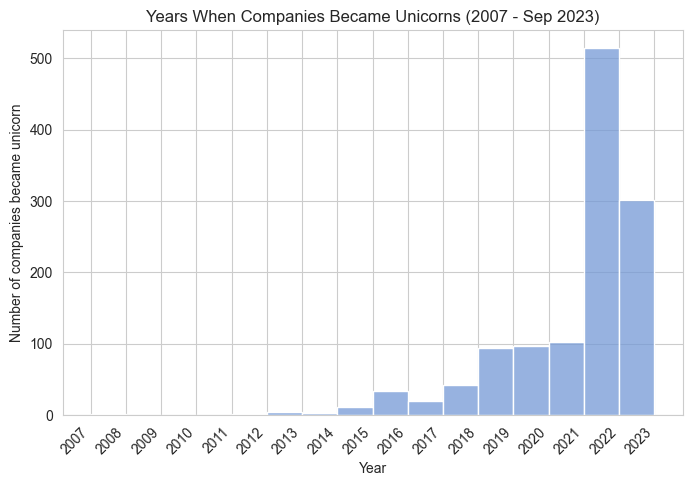

In [41]:
#create a histogram on the distribution
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')

sns.histplot(companies['Year'], bins=range(2007, 2024, 1),color='#7499D6')

plt.xticks(range(2007, 2024,1))
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Number of companies became unicorn')
plt.title('Years When Companies Became Unicorns (2007 - Sep 2023)') #In which year companies bacame unicorn?

plt.show()

In [42]:
before_pandemic = len(companies[companies['Date Joined'] < '2020-03-11']['Company'])
before_pandemic_proportion = round((before_pandemic/len(companies)) *100, 2)

after_pandemic = len(companies[companies['Date Joined'] > '2020-03-10']['Company'])
after_pandemic_proportion = round((after_pandemic/len(companies)) *100, 2)

print('Before the Pandemic, '+ str(before_pandemic) + ' companies became unicorns, which is ' + str(before_pandemic_proportion) + '% of the list')
print('After the Pandemic, '+ str(after_pandemic) + ' companies became unicorns, which is ' + str(after_pandemic_proportion) + '% of the list')

Before the Pandemic, 321 companies became unicorns, which is 26.27% of the list
After the Pandemic, 901 companies became unicorns, which is 73.73% of the list


2022 is the year when the most companies became Unicorn, followed by 2023 and 2021. After the World Health Organization (WHO) declared the COVID-19 Pandemic on March 11, 2020, 901 comapnies became unicorns, almost tripled before the Pandemic. It seems that the Pandamic and following economic constraints didn't slow down some companies' growth and their path to eventually became unicorn. 

Note that the data type of "Valuation ($B)" is object. To conduct further numberical analyses, it's essential to convert it to the float type.

In [43]:
#convert the column "Valuation ($B)" to numeric by removing "$B" and assign a new column "Valuation" to contain the outcomes
companies['Valuation_numeric'] = companies['Valuation ($B)'].apply(lambda v: v.strip('$B')).astype(float)
companies.dtypes

Company                      object
Valuation ($B)               object
Date Joined          datetime64[ns]
Country                      object
City                         object
Industry                     object
Select Investors             object
Days Since Joined             int64
Year                          int64
Valuation_numeric           float64
dtype: object

In [44]:
#investigate the descrptive statistics
companies.describe()

,Date Joined,Days Since Joined,Year,Valuation_numeric
count,1222,1222.000000,1222.000000,1222.000000
mean,2020-10-10 01:30:44.189852672,1089.936989,2020.297054,3.128429
min,2007-07-02 00:00:00,15.000000,2007.000000,1.000000
25%,2020-01-04 00:00:00,648.250000,2020.000000,1.100000
50%,2021-06-08 00:00:00,849.000000,2021.000000,1.575000
75%,2021-12-25 18:00:00,1370.000000,2021.000000,3.000000
max,2023-09-20 00:00:00,5939.000000,2023.000000,225.000000
std,NaN,718.003976,1.996961,8.487581


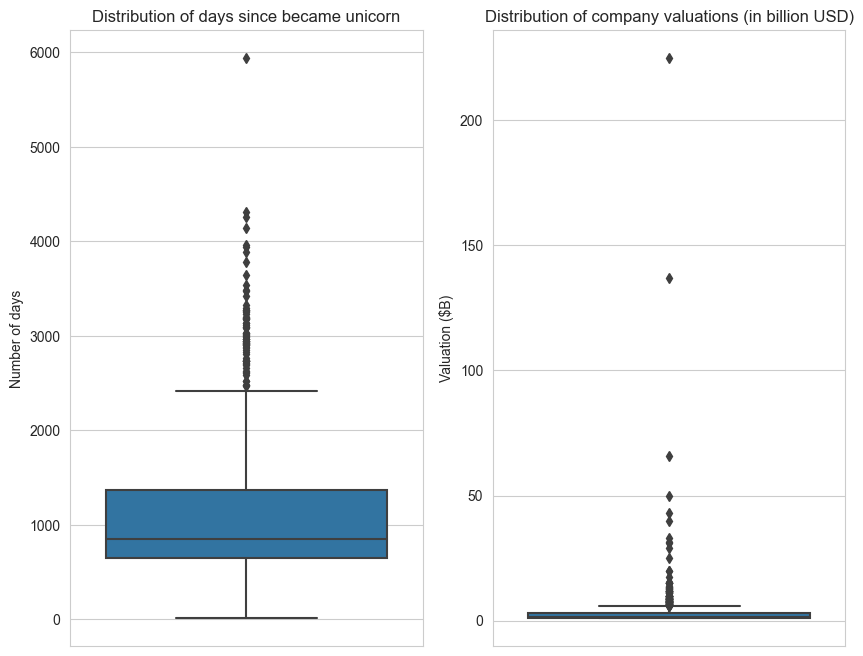

In [45]:
#create boxplots to visualize the distributions of "Days Since Joined" and "Valuation_numeric"
plt.figure(figsize=(10,8))

ax1 = plt.subplot(1,2,1)
sns.boxplot(y=companies['Days Since Joined'], showfliers=True, ax=ax1)
ax1.set_title('Distribution of days since became unicorn')
ax1.set_ylabel('Number of days')

ax2 = plt.subplot(1,2,2)
sns.boxplot(y=companies['Valuation_numeric'], showfliers=True, ax=ax2)
ax2.set_title('Distribution of company valuations (in billion USD)')
ax2.set_ylabel('Valuation ($B)')

plt.show()


The decriptive statistics provides a summary on the numeric data (i.e. "Data Joined", "Days Since Joined", "Year" and "Valuation_numeric"). There is no incorrect value: all the valuations, date joined and days since joined are positive.

The column "Days Since Joined" records number of days since companies have became unicorns to September 30, 2023. One unicorn is just 12-day old! On average, companies maintain the status for 1,086 days, or almost 3 years. The oldest unicorn has the seniority of 5,936 days, or more than 16 years. 

On average, unicorn companies has a valuation of $3.12 billion. But from one unicorn to another, individual valuations vary dramatically: some companies are valued solely $1 billion while the largest one is valued $225 billion. The individual valuations are not distributed proportionally. At the evaluation phase we will investigate the relationshop between the indutries of unicorns and valuations: are some industries associated with a higher average valuation?

## **3.Building visualizations**

In this section, we will build visualizations to help answer the following questions:
1. Are some industries associated with a higher average valuation?
2. Does the Pandemic fasten company growth and eventually lead companies to become a unicorn?
3. Where are most of unicorn located? What are the top industries in the top countries?
4. Who are the top investors and what do their investment portfolios look like?

1. Are some industries associated with a higher average valuation?
   
    To answer this question, we need to sort average valuations by industry

In [46]:
#check the industry inventory
print('There are ' + str(companies['Industry'].nunique()) + ' industries listed: ')

industry_list = companies.groupby(by='Industry')['Company'].size().reset_index()
industry_list.columns = ['Industry', 'Company']
industry_list = industry_list.sort_values(by='Company', ascending=False)
industry_list['Proportion (%)'] = round(industry_list['Company'] / industry_list['Company'].sum()*100,2)

print(industry_list)

There are 7 industries listed: 
                     Industry  Company  Proportion (%)
1             Enterprise Tech      373           30.52
2          Financial Services      215           17.59
0           Consumer & Retail      214           17.51
4                 Industrials      191           15.63
3  Healthcare & Life Sciences      122            9.98
6       Media & Entertainment       81            6.63
5                   Insurance       26            2.13


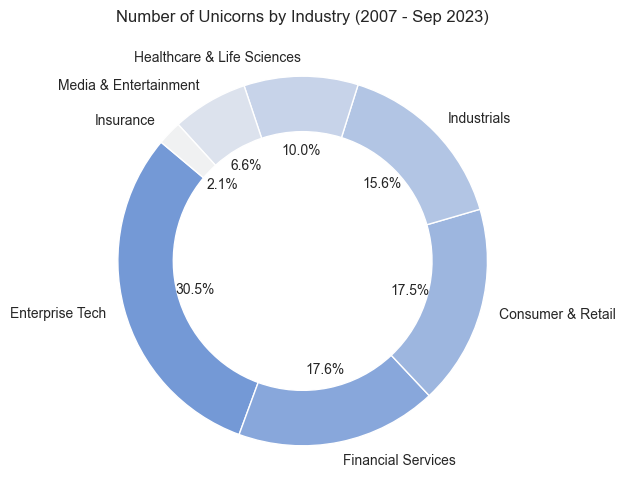

In [47]:
#create a pie chart to show distribution of industries
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')

# Extracting the color palette for the number of unique industries
colors = sns.light_palette('#7499D6', n_colors=len(companies['Industry'].unique()), reverse=True)

# Using the plt.pie() function to generate the pie chart
plt.pie(industry_list['Company'], labels=industry_list['Industry'], colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))

plt.title('Number of Unicorns by Industry (2007 - Sep 2023)')
plt.show()

Every one in three (30.52%) unicorn companies listed is in the technology industry. The differences between tech companies and the rest are significant: tech unicorns are nearly  double in number compared to those in financial services, which is the second most common industry.

Investing in the technology industry has become increasingly popular in recent years. Technology industry historically outperformed the overall stock market by a wide margin: in the past decade, it has yielded an annualized return of about 13%, almost double the return of 7% for the S&P 500. 

In [48]:
#check the average valuation by industry
avg_valuation_by_industry = companies.groupby(by='Industry')['Valuation_numeric'].mean()
avg_valuation_by_industry = avg_valuation_by_industry.sort_values(ascending=False).reset_index()
avg_valuation_by_industry.columns = ['Industry', 'Average Valuation ($B)']
avg_valuation_by_industry

,Industry,Average Valuation ($B)
0,Media & Entertainment,6.145185
1,Financial Services,3.259395
2,Industrials,3.208639
3,Consumer & Retail,2.903785
4,Enterprise Tech,2.819786
5,Healthcare & Life Sciences,2.307705
6,Insurance,2.185769


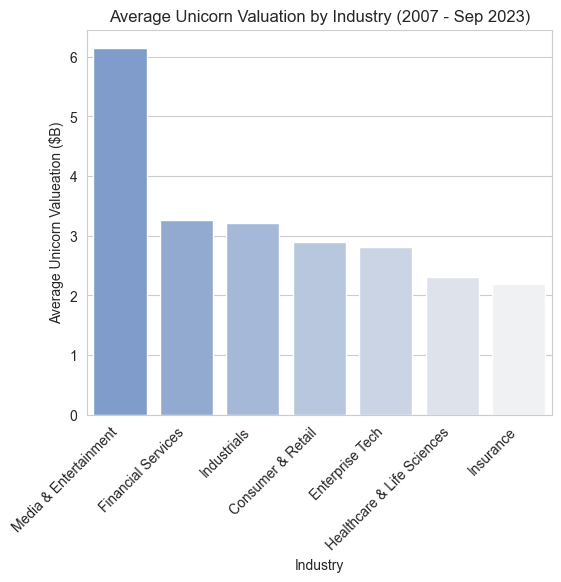

In [49]:
#create a bar chart
plt.figure(figsize=(6,5))

sns.set_style('whitegrid')
palette = sns.light_palette(color='#7499D6', n_colors=len(avg_valuation_by_industry['Industry']), reverse=True)

sns.barplot(data=avg_valuation_by_industry, x='Industry', y='Average Valuation ($B)', palette=palette)

plt.title('Average Unicorn Valuation by Industry (2007 - Sep 2023)') #Media & Entertainment Industry is most preferred by capital
plt.ylabel('Average Unicorn Valueation ($B)')
plt.xticks(rotation=45, horizontalalignment='right')


plt.show()

Unicorns in the media & entertainment industry have the highest average valuation of $6.14 billion, followed by those in financial services and industrials. Although technology companies are the most on the list, they don't necessarily have the highest valuation.

2. Does the Pandemic fasten company growth and eventually lead companies to become a unicorn?

    To answer this question, we can compare and visualize numbers of unicorns before and after the Pandemic and their valuations

In [50]:
#create a list to compare the number of newly joined unicorns by industry before and after the Pandemic
companies_by_industry = []

for industry in companies['Industry'].unique():
    subset = companies[companies['Industry'] == industry]
    
    before_pandemic_count = len(subset[subset['Date Joined'] < '2020-03-11']['Company'])
    before_pandemic_proportion = round((before_pandemic_count/len(subset)) *100, 2)
    after_pandemic_count = len(subset[subset['Date Joined'] > '2020-03-10']['Company'])
    after_pandemic_proportion = round((after_pandemic_count/len(subset)) *100, 2)

    companies_by_industry.append({
        'Industry': industry,
        'Before Pandemic': before_pandemic_count,
        'After Pandemic': after_pandemic_count,
        'Before Pandemic Proportion': before_pandemic_proportion,
        'After Pandemic Proportion': after_pandemic_proportion
    })

    print(f"Industry: {industry}")
    print(f"Before Pandemic: {before_pandemic_count}" + f" Proportion: {before_pandemic_proportion}"+'%')
    print(f"After Pandemic: {after_pandemic_count}" + f" Proportion: {after_pandemic_proportion}"+'%')
    print("-----------")

companies_by_industry_df = pd.DataFrame(companies_by_industry)


Industry: Media & Entertainment
Before Pandemic: 29 Proportion: 35.8%
After Pandemic: 52 Proportion: 64.2%
-----------
Industry: Industrials
Before Pandemic: 64 Proportion: 33.51%
After Pandemic: 127 Proportion: 66.49%
-----------
Industry: Consumer & Retail
Before Pandemic: 89 Proportion: 41.59%
After Pandemic: 125 Proportion: 58.41%
-----------
Industry: Financial Services
Before Pandemic: 39 Proportion: 18.14%
After Pandemic: 176 Proportion: 81.86%
-----------
Industry: Enterprise Tech
Before Pandemic: 72 Proportion: 19.3%
After Pandemic: 301 Proportion: 80.7%
-----------
Industry: Healthcare & Life Sciences
Before Pandemic: 23 Proportion: 18.85%
After Pandemic: 99 Proportion: 81.15%
-----------
Industry: Insurance
Before Pandemic: 5 Proportion: 19.23%
After Pandemic: 21 Proportion: 80.77%
-----------


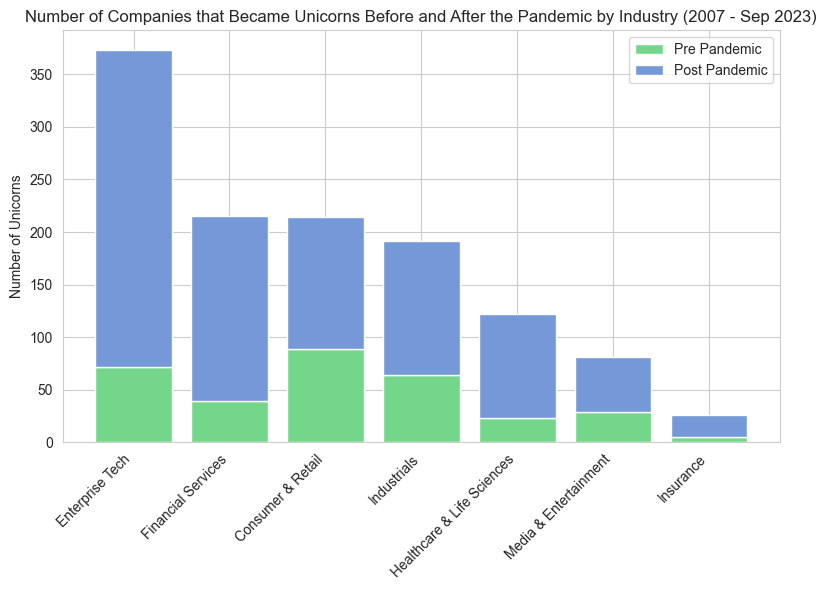

In [51]:
#visualization
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')

companies_by_industry_df['Total Unicorn Counts'] = companies_by_industry_df['Before Pandemic'] +companies_by_industry_df['After Pandemic']
companies_by_industry_df= companies_by_industry_df.sort_values('Total Unicorn Counts', ascending=False)

# Create a stacked bar chart

plt.bar(companies_by_industry_df['Industry'], companies_by_industry_df['Before Pandemic'], label='Pre Pandemic', color='#74D68B')
plt.bar(companies_by_industry_df['Industry'], companies_by_industry_df['After Pandemic'], label='Post Pandemic', bottom=companies_by_industry_df['Before Pandemic'], color='#7499D6')

plt.ylabel('Number of Unicorns')
plt.title('Number of Companies that Became Unicorns Before and After the Pandemic by Industry (2007 - Sep 2023)') #More tech companies became unicorns post-Pandemic
plt.legend()
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()


Investors appreciate the technology industry's lucrative opportunities for long-term growth. Our data shows that the technology industry outperforms other service industries (financial services, healthcare and insurance), and is more resilient during and post-Pandemic era. 229, or 318% more tech companies have become unicorns since the Pandemic. 

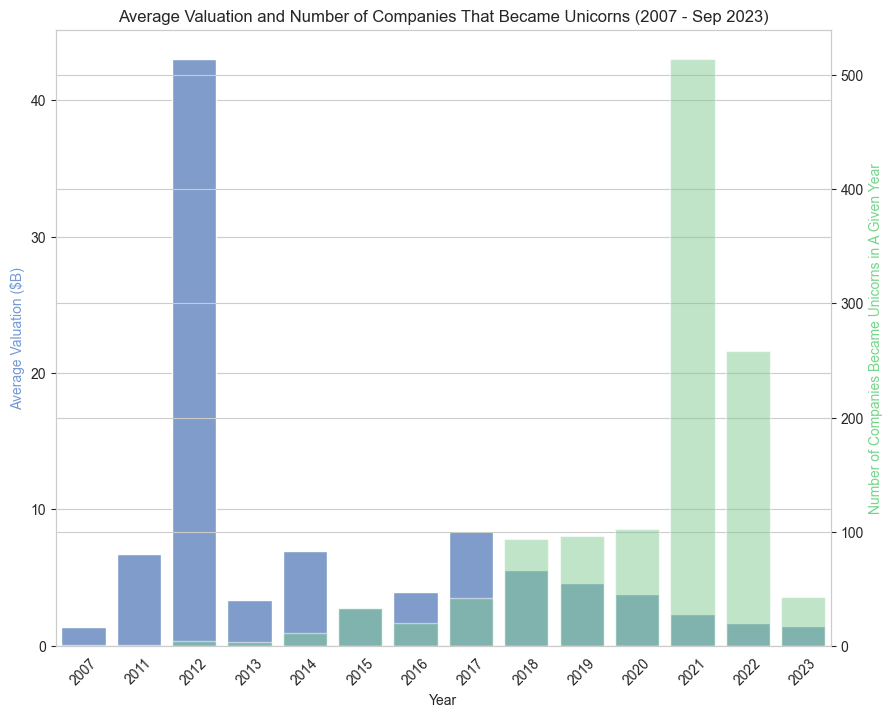

In [52]:
companies_by_year = companies.groupby(by='Year')['Company'].size().reset_index()
companies_by_year.columns = ['Year', 'Number of Companies Became Unicorns']

avg_valuation_by_year = companies.groupby(by='Year')['Valuation_numeric'].mean().reset_index()
avg_valuation_by_year.columns = ['Year', 'Average Valuation']

sns.set_style('whitegrid')

fig, ax1 = plt.subplots(figsize=(10,8))
# First Plot
sns.barplot(data=avg_valuation_by_year, x='Year', y='Average Valuation', ax=ax1, color='#7499D6')
ax1.set_ylabel('Average Valuation ($B)', color='#7499D6')
plt.xticks(rotation=45)

# Create the secondary y-axis
ax2 = ax1.twinx()
sns.barplot(data=companies_by_year, x='Year', y='Number of Companies Became Unicorns', ax=ax2, alpha=0.5, color='#74D68B')
ax2.set_ylabel('Number of Companies Became Unicorns in A Given Year', color='#74D68B')

plt.title('Average Valuation and Number of Companies That Became Unicorns (2007 - Sep 2023)') #Quality matters more than quantity

plt.show()

In [53]:
#compare number of newcomers and average valuations side by side
companies_by_year.merge(avg_valuation_by_year, left_on='Year', right_on='Year')

,Year,Number of Companies Became Unicorns,Average Valuation
0,2007,1,1.380000
1,2011,1,6.700000
2,2012,4,43.000000
3,2013,3,3.333333
4,2014,11,6.981818
5,2015,33,2.753030
6,2016,20,3.958500
7,2017,42,8.410476
8,2018,94,5.538085
9,2019,96,4.630000


According to the bar chart above, the average valuation of unicorn companies by year and number of companies that became unicorns by year don't resonate together. Companies before the Pandemic tend to have higher average valuation. Companies that joined the list in 2012 have the highest average valuation of $43 billion. It can be because they are more established overtime. Quantity wise, there has been a upsurge in newly unicorns since 2020. But those newcomers don't necessarily have a high average valuation.

We do see some companies in some industries soar during the Pandemic and grow significantly enough to become a unicorn, but more established companies are more preferred by investors and capitals. Quality does matter more than quantity.

3. Where are most of unicorn located? What are the top industries in the top countries?

In [54]:
#check all the countries on the list
print(companies['Country'].unique())

['China' 'United States' 'Singapore' 'Australia' 'United Kingdom'
 'Indonesia' 'Germany' 'India' 'Hong Kong' 'Israel' 'Seychelles' 'Sweden'
 'Turkey' 'Mexico' 'Estonia' 'Canada' 'South Korea' 'Netherlands' 'France'
 'Finland' 'Colombia' 'Belgium' 'Brazil' 'Denmark' 'Switzerland'
 'Lithuania' 'Austria' 'Ireland' 'Vietnam' 'United Arab Emirates'
 'Argentina' 'Spain' 'Greece' 'Japan' 'Luxembourg' 'Nigeria' 'Croatia'
 'Senegal' 'Malaysia' 'Bermuda' 'Norway' 'South Africa' 'Ecuador' 'Chile'
 'Thailand' 'Czech Republic' 'Cayman Islands' 'Liechtenstein' 'Italy'
 'Philippines']


In [55]:
#investigate numbers of uniconrs by country
companies_by_country = companies.groupby('Country')['Company'].size()
companies_by_country = companies_by_country.sort_values(ascending=False)
companies_by_country = pd.DataFrame(companies_by_country).reset_index()
companies_by_country.columns = ['Country', 'Number of Unicorns']

companies_by_country


,Country,Number of Unicorns
0,United States,654
1,China,172
2,India,71
3,United Kingdom,53
4,Germany,31
5,France,25
6,Israel,23
7,Canada,21
8,Singapore,16
9,Brazil,16


In [56]:
#locate the top 10 countries
companies_by_country.head(10)

,Country,Number of Unicorns
0,United States,654
1,China,172
2,India,71
3,United Kingdom,53
4,Germany,31
5,France,25
6,Israel,23
7,Canada,21
8,Singapore,16
9,Brazil,16


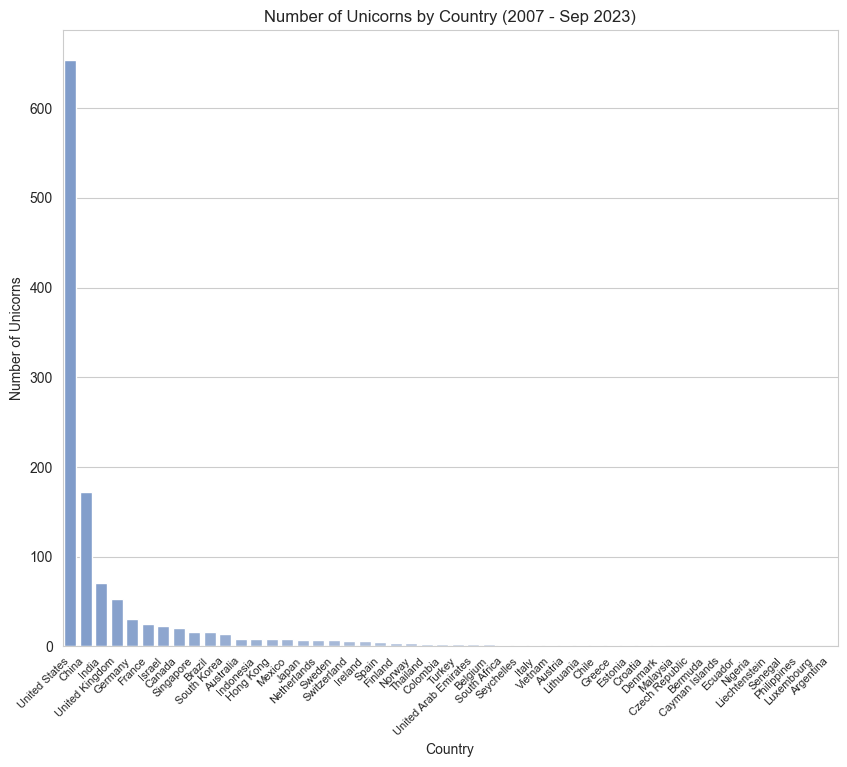

In [57]:
#create a plot that shows countries with most unicorns
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
palette = sns.light_palette('#7499D6', n_colors=len(companies_by_country), reverse=True)

sns.barplot(data=companies_by_country, x='Country', y='Number of Unicorns', palette=palette)

plt.title('Number of Unicorns by Country (2007 - Sep 2023)') #US is home more than half of unicorn companies
plt.xticks(rotation=45, horizontalalignment='right', fontsize=8)

plt.show()

North America and Europe are home to many unicorns where human capital is better educated, infrastructure is more developed and financial markets are more capital friendly. The United States of America champions the list with 654, or 53% of unicorn companies listed. The US-based unicorns are more than doubled in number than those based in second-placed China. Note that China and India are the only two developing countries on the top 10 list. Both countries have a large amount of cheap labour with relatively high education levels.

But does those top countries necessarily have higher average unicorn valuations, and what are top 3 industries in each of those countries?

In [58]:
us_companies = companies[companies['Country'] == 'United States']
us_top_industries = us_companies.groupby('Industry')['Valuation_numeric'].mean()
us_top_industries = us_top_industries.sort_values(ascending=False)

top_3 = ['United States', 'China', 'India']

top_industries = []

for country in top_3:
    country_companies = companies[companies['Country']== country]
    country_top_industries = country_companies.groupby('Industry')['Valuation_numeric'].mean()
    country_top_industries = country_top_industries.sort_values(ascending=False)
    country_top_industries_df = country_top_industries.reset_index()
    country_top_industries_df['Country'] = country
    top_industries.append(country_top_industries_df)

top_10_df = pd.concat(top_industries, axis=1).reset_index(drop=True)
top_10_df

,Industry,Valuation_numeric,Country,Industry,Valuation_numeric,Country,Industry,Valuation_numeric,Country
0,Industrials,4.333649,United States,Media & Entertainment,20.241538,China,Media & Entertainment,4.058333,India
1,Media & Entertainment,3.795814,United States,Consumer & Retail,2.826400,China,Financial Services,3.093333,India
2,Financial Services,3.395000,United States,Industrials,2.415636,China,Industrials,3.003636,India
3,Enterprise Tech,2.945118,United States,Healthcare & Life Sciences,2.223333,China,Consumer & Retail,2.694815,India
4,Consumer & Retail,2.894247,United States,Financial Services,1.928889,China,Insurance,2.500000,India
5,Healthcare & Life Sciences,2.330870,United States,Enterprise Tech,1.748333,China,Healthcare & Life Sciences,1.450000,India
6,Insurance,2.019167,United States,NaN,NaN,NaN,Enterprise Tech,1.328571,India


In the United States, Industrials is the top industry with an average valuation of $4.33 billion, followed by media & entertainment ($3.80 billion) and financial services ($3.40 billion). 
Chinese media & entertainment unicorns are significantly more preferred, with an average valuation of $20.24 billion. Consumer & retail industry has the second highest average valuation of $2.83 billion, followed by Industrials ($2.42 billion).
In the United States, Media & Entertainment is the top industry with an average valuation of $4.06 billion, followed by financial services ($3.09 billion) and industrials ($3.01 billion). 

Finally, we want to give a better idea where are those unicorn companiess located in the world.

In [59]:
#in order to show unicorns based in the US, we need to replace and match the name
companies_by_country.replace({'United States': 'United States of America'}, inplace=True)

/var/folders/7d/20v33v596_qcks0vc6491h9m0000gn/T/ipykernel_96809/3985374091.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/7d/20v33v596_qcks0vc6491h9m0000gn/T/ipykernel_96809/3985374091.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged['centroids'] = merged.geometry.centroid
/var/folders/7d/20v33v596_qcks0vc6491h9m0000gn/T/ipykernel_96809/3985374091.py:30: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, country_name, unicorn_count in z

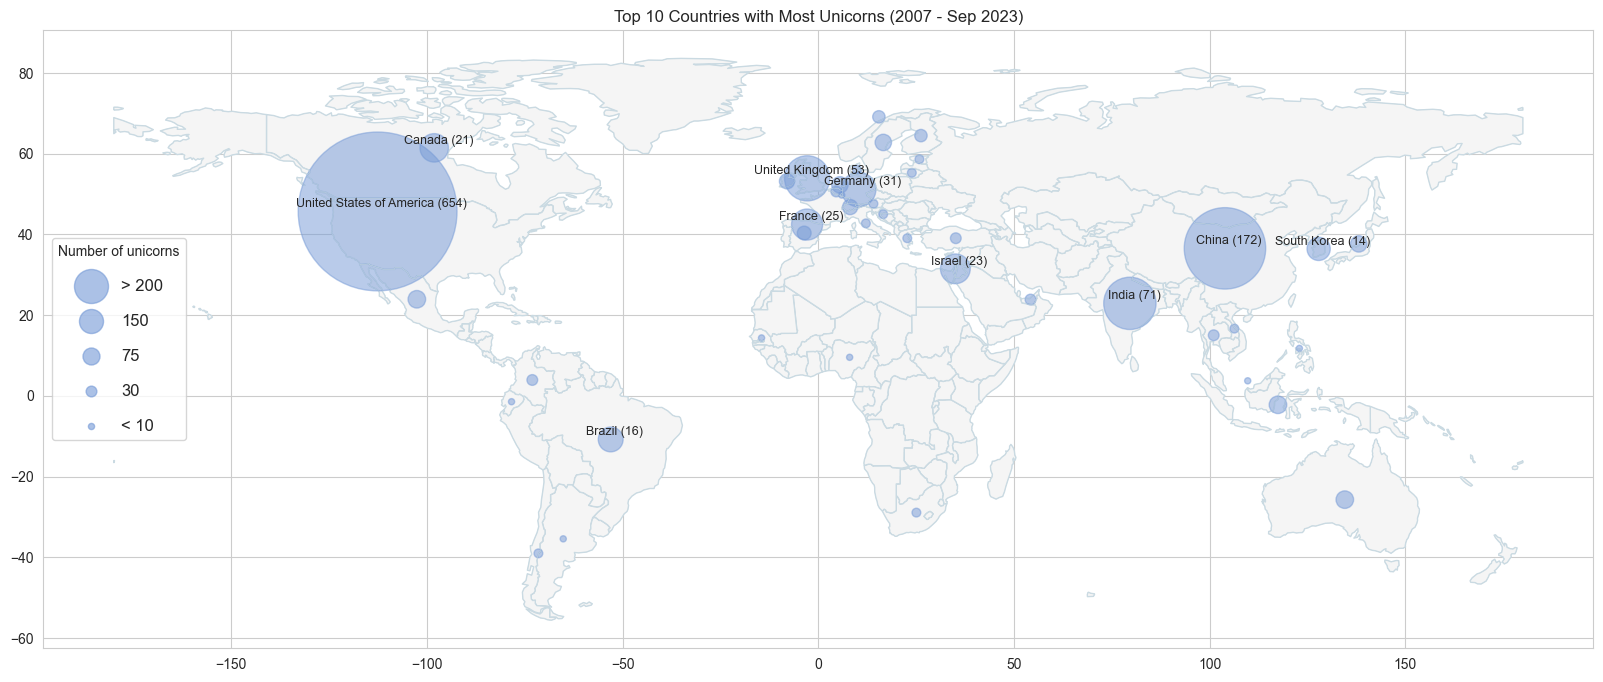

In [60]:
#call the Geopandas' world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.name != 'Antarctica']

merged = world.set_index('name').join(companies_by_country.set_index('Country'))
merged = merged.dropna(subset=['Number of Unicorns'])

merged['centroids'] = merged.geometry.centroid

#plotting
fig, ax = plt.subplots(1,1,figsize=(20,30))
world.boundary.plot(ax=ax, linewidth=0.2, edgecolor='#CADAE2')
world.plot(ax=ax, color='whitesmoke',edgecolor='#CADAE2')

x_coords = merged['centroids'].x
y_coords = merged['centroids'].y

#add scattered dots on the map
ax.scatter(x_coords, y_coords, s=merged['Number of Unicorns']*20, color='#7499D6', alpha=0.5)

legend_labels = ['> 200', '150', '75', '30', '< 10']
legend_sizes = [300*2, 150*2,75*2, 30*2, 10*2]

for size, label in zip(legend_sizes, legend_labels):
    plt.scatter([], [], c='#7499D6', alpha=0.6, s=size, label=label)
plt.legend(scatterpoints=1, title='Number of unicorns', loc='center left', labelspacing=1.2, prop={'size':12})

#show the top 10 countries
top_10 = merged.nlargest(10, 'Number of Unicorns')
for x, y, country_name, unicorn_count in zip(top_10.geometry.centroid.x, top_10.geometry.centroid.y, top_10.index, top_10['Number of Unicorns']):
    ax.annotate(f'{country_name} ({int(unicorn_count)})',
                xy=(x, y),
                xytext=(3,3),
                fontsize=9,
                textcoords="offset points",
                ha='center')


plt.title('Top 10 Countries with Most Unicorns (2007 - Sep 2023)')

plt.show()

4. Who are the top investors and what do their investment portfolios look like?

According to Google, the top 3 investors behind unicorn companies are Sequoia Capital, Tiger Global Management and Accel. Let's explore their investment portfolios and investment results.

In [61]:
#create dummy variables to indicate if one top investor is a Select Investor
companies['Sequoia Capital'] = companies['Select Investors'].str.contains('Sequoia Capital')
companies['Sequoia Capital'] = companies['Sequoia Capital'].astype(int)

companies['Tiger Global Management'] = companies['Select Investors'].str.contains('Tiger Global Management')
companies['Tiger Global Management'] = companies['Tiger Global Management'].astype(int)

companies['Accel'] = companies['Select Investors'].str.contains('Accel')
companies['Accel'] = companies['Accel'].astype(int)

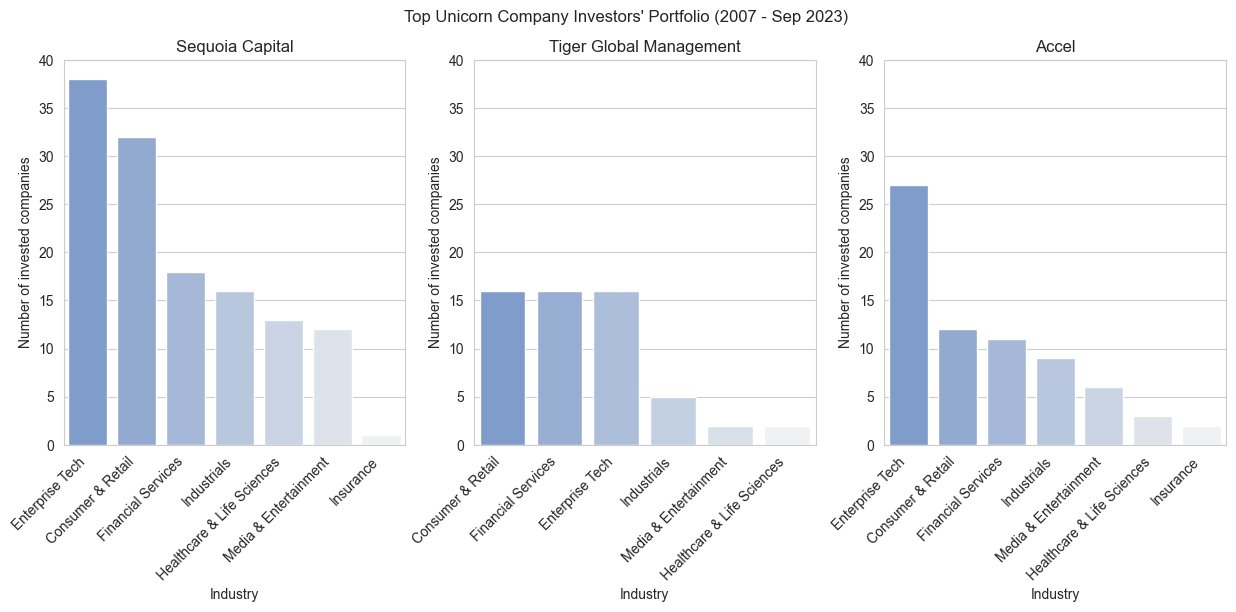

In [62]:
#create 3 bar charts to show diversification of top 3 investors' portfolios
top_investors = ['Sequoia Capital', 'Tiger Global Management', 'Accel']

fig, axes = plt.subplots(1,3,figsize=(15,5))

idx=0

for c in top_investors:
    invested_companies = companies[companies[c] == 1]
    invested_companies = invested_companies['Industry'].value_counts()

    palette = sns.light_palette('#7499D6', n_colors=len(invested_companies), reverse=True)

    sns.barplot(x=invested_companies.index, y=invested_companies.values, ax=axes[idx], palette=palette)
    
    axes[idx].set_title(c)
    axes[idx].set_xlabel('Industry')
    axes[idx].set_ylabel('Number of invested companies')
    axes[idx].set_ylim(0,40)

    axes[idx].set_xticklabels(invested_companies.index, rotation=45, horizontalalignment='right')

    idx += 1


plt.suptitle("Top Unicorn Company Investors' Portfolio (2007 - Sep 2023)" )

plt.show()

Investments are pretty diversified by top unicorn company investors. Technology, consumer & retail and financial services are the three most commonly invested-in industries. 
Sequoia Capital and Accel's top choice are those in the technology industry, while Tiger Global Management invested equally in consumer & retail, financial services and technology industries.

In [63]:
print('Highest valued unicorns invested in by Sequoia Capital: ')
print(companies[companies['Sequoia Capital'] == 1]['Company'].values[:3])

print('Highest valued unicorns invested in by Tiger Global Management: ')
print(companies[companies['Tiger Global Management'] == 1]['Company'].values[:3])

print('Highest valued unicorns invested in by Accel: ')
print(companies[companies['Accel'] == 1]['Company'].values[:3])

Highest valued unicorns invested in by Sequoia Capital: 
['ByteDance' 'SHEIN' 'Canva']
Highest valued unicorns invested in by Tiger Global Management: 
['SHEIN' 'JUUL Labs' 'Checkout.com']
Highest valued unicorns invested in by Accel: 
['Miro' 'DJI Innovations' 'Gopuff']


In [64]:
#check companies that top investors invested in in common
companies['Top Investors'] = companies['Sequoia Capital'] + companies['Tiger Global Management'] + companies['Accel']
top_invested_companies = companies[companies['Top Investors'] > 1]
top_invested_companies_list = top_invested_companies['Company'].values

print('Number of unicorns with two or more of top investors: ')
print(len(top_invested_companies_list))

print('they are: ')
print(top_invested_companies_list)


Number of unicorns with two or more of top investors: 
17
they are: 
['SHEIN' 'DJI Innovations' 'Getir' 'Razorpay' 'Ola' 'CRED'
 'ChargeBee Technologies' 'Ironclad' 'Groww' 'Infra.Market' 'Zetwerk'
 'Ethos' 'CoinSwitch' 'Zenoti' 'Veriff' 'CaptivateIQ' 'Vedantu']


The highest valued unicorned invested in by Sequoia Capital are Chinese technology company ByteDance, Singaporean retail company SHEIN and Australian technology company Canvas. 
The highest valued unicorned invested in by Tiger Global Management are SHEIN, American consumer product company JUUL Labs and British financial services company Checkout.com.The highest valued unicorned invested in by Accel are American technology company Miro, Chinese technology company DJI Innovations and American consumer product company Gopuff.

There are 17 unicorns are invested in by at least 2 top investors: SHEIN, DJI Innovations, Getir, Razorpay, Ola, CRED, ChargeBeem Technologies, Ironclad, Groww, Infra.Market, Zetwerk, Ethos, CoinSwitch, Zenoti, Veriff, CaptivateIQ, and Vedantu.

Last, let's explore top investors' global presence.

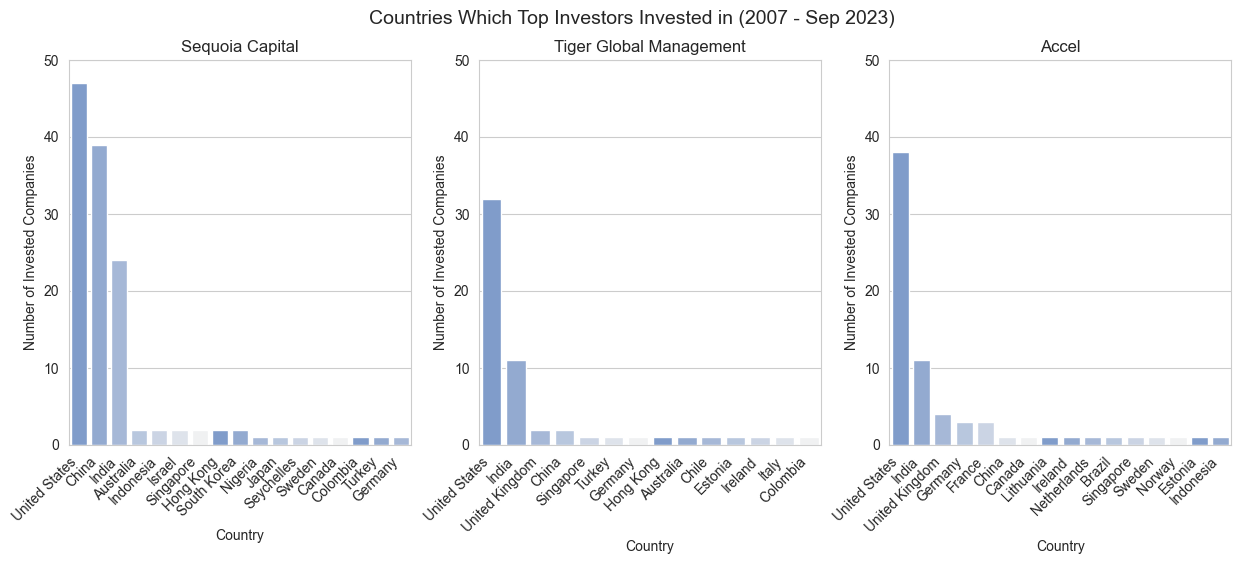

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

idx=0

for c in top_investors:
    invested_countries = companies[companies[c] == 1]
    invested_countries = invested_countries['Country'].value_counts()
  

    palette = sns.light_palette('#7499D6', n_colors=len(invested_companies), reverse=True)

    sns.barplot(x=invested_countries.index, y=invested_countries.values, ax=axes[idx], palette=palette)

    axes[idx].set_title(c)
    axes[idx].set(ylim=(0,50))
    axes[idx].set_ylabel('Number of Invested Companies')
    axes[idx].set_xticklabels(invested_countries.index, rotation=45, horizontalalignment='right')

    idx += 1

plt.suptitle('Countries Which Top Investors Invested in (2007 - Sep 2023)', fontsize=14)
plt.show()

Sequoia and Accel's investment presence is more geographically diversified and have invested in more countries than Tiger Global Management, Sequoia is the only investor that has invested in Africa. Acel is the only investor to not have any unicorn investment in Oceania so far.

## **4.Evaluation and share results**

Exploratory data analysis (EDA) is important because it helps an analyst to know the data, clean its missing data, fix its incorrect data and prepare it for future modeling. Visualizations help answer the following questions:

**1. Are some industries associated with a higher average valuation?**

Unicorns in the media & entertainment industry have the highest average valuation of $6.14 billion, followed by those in financial services and industrials. Although technology companies makes a third of the list, they don't necessarily have the highest valuation.

**2. Does the Pandemic fasten company growth and eventually lead companies to become a unicorn?**

Investors appreciate the technology industry's lucrative opportunities for long-term growth and resiliency during economic downturns. Our data shows that the technology industry outperforms other service industries (financial services, healthcare and insurance). During and post-Pandemic era. 229, or 318% more tech companies have become unicorns since the Pandemic.

Across all industries, there has been an upsurge in newly unicorns since 2020. But those newcomers don't necessarily have a high average valuation. We do see some companies in some industries soar during the Pandemic and grow significantly enough to become a unicorn, but more established companies are more preferred by investors. Quality does matter more than quantity.

**3. Where are most of unicorn located? What are the top industries in the top countries?**

North America and Europe are home to many unicorns. US-based companies alone makes 53% of the list. China and India are the only two developing countries on the top 10 list. Both emerging countries have a large amount of cheap labour with relatively high education levels. 
    
In the U.S., Industrials is the top industry with an average valuation of $4.33 billion. Chinese media & entertainment unicorns are significantly more preferred, with an average valuation of $20.24 billion. In India, Media & Entertainment is the top industry with an average valuation of $4.06 billion.
    
**4. Who are the top investors and what do their investment portfolios look like?**

Sequoia Capital, Tiger Global Management and Accel are the top investors. Sequoia Capital and Accel's top choice are those in the technology industry, while Tiger Global Management invested equally in consumer & retail, financial services and technology industries. Sequoia and Accel's investment presence is more geographically diversified and have invested in more countries than Tiger Global Management, Sequoia is the only investor that has invested in Africa. Acel is the only investor to not have any unicorn investment in Oceania so far. 

The highest valued unicorned invested in by Sequoia Capital are Chinese technology company ByteDance, Singaporean retail company SHEIN and Australian technology company Canvas. The highest valued unicorned invested in by Tiger Global Management are SHEIN, American consumer product company JUUL Labs and British financial services company Checkout.com.The highest valued unicorned invested in by Accel are American technology company Miro, Chinese technology company DJI Innovations and American consumer product company Gopuff.

There are 17 unicorns that are invested in by at least 2 top investors.